# Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Задача**: выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

**Этапы проекта:**

1. Описание данных
2. Загрузка данных и анализ общей информации
3. Предобработка данных

- замена названия столбцов
- преобразование данные в нужные типы
- обработка пропусков и дубликатов

4. Исследовательский анализ данных

- анализ количества выпускаемых игр в разные годы, изменение продаж по платформам
- определение платформ с наибольшими суммарными продажами, соответствующих актуальному периоду анализа (2013-2017)
- влияние критиков и пользователей на продажи для платформы PS4
- влияние критиков и пользователей на продажи других платформ
- портрет пользователя каждого региона
- проверка гипотез

5. Общий вывод

# Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
Данные за 2016 год могут быть неполными.

# Загрузка данных и анализ общей информации

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats as st
import warnings; warnings.filterwarnings(action = 'ignore')

In [12]:
# Загрузка данных

try:
    df = pd.read_csv('/datasets/games.csv')

except:
    df = pd.read_csv('/Users/damayboroda/study/data_for_projects/games.csv')


In [13]:
def show_info(df):
    # Выводим информацию о наборе данных с помощью display()
    print("Информация о наборе данных:")
    print(df.info())
    print('---------')
    # Выводим первые 5 строк датафрейма с помощью display()
    print("Первые 5 строк:")
    display(df.head())

show_info(df)

Информация о наборе данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
---------
Первые 5 строк:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В датафрейме 11 столбцов, пропуски содержат следующие столбцы: Name, Year_of_Release, Genre и в основном Critic_Score, User_Score, Rating. 
Тип данных - object или float. Данные содержат 16715 наблюдений (строк).

# Предобработка данных

Приведем названия столбцов к нижнему регистру.

In [14]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Обработка пропусков

Посмотрим на количество пропусков в датафрейме

In [15]:
def display_missing(df):
    # Получаем количество пропущенных значений для каждой колонки
    missing_counts = df.isnull().sum()
    
    # Получаем процент пропущенных значений от общего числа записей для каждой колонки
    missing_percent = (missing_counts / len(df)) * 100
    
    # Создаем новый датафрейм для отображения результатов
    missing_info = pd.DataFrame({'Количество пропусков': missing_counts, 'Процент пропусков': missing_percent})
    
    # Сортируем результаты по убыванию процента пропусков
    missing_info = missing_info.sort_values(by='Процент пропусков', ascending=False)
    
    return missing_info

missing_info = display_missing(df)
print(missing_info)


                 Количество пропусков  Процент пропусков
critic_score                     8578          51.319174
rating                           6766          40.478612
user_score                       6701          40.089740
year_of_release                   269           1.609333
name                                2           0.011965
genre                               2           0.011965
platform                            0           0.000000
na_sales                            0           0.000000
eu_sales                            0           0.000000
jp_sales                            0           0.000000
other_sales                         0           0.000000


Удалим пропуски в столбцах name, genre, year_of_release, так как их мало (<2% всех наблюдений). Это не повлияет на качество данных.

In [16]:
df = df.dropna(subset=['name', 'genre', 'year_of_release'])

Посмотрим на уникальные значения оставшихся столбцов с пропусками

In [17]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.Заменим значение 'tbd' на nan, так как мы точно не узнаем, какие значения подразумевались.

In [18]:
df['user_score'] = df['user_score'].replace({'tbd':np.nan})

In [19]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Тут все в порядке

In [20]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Здесь тоже

**Выводы:**
- удалили пропуски там, где это не повляет на качество данных (минимальный процент пропусков)
- пропуски в столбцах с рейтингами не будем ничем заполнять, так как их процент очень высок (от 40% до 51%). Удаление или заполенение такого количества данных может привести к искажению.

## Преобразуем данные в нужные типы

In [21]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [22]:
df['user_score'] = df['user_score'].astype('float')

Заменили данные в столбцах:
- year_of_release, так как год не может быть дробным числом
- user_score, так как оценка пользователей числовая (был object из-за значения 'tbd' - заменили это значение на nan и изменили тип данных на float).

## Проверка на дубликаты

In [23]:
df.duplicated().sum()

0

Полных дубликатов не обнаружено

Проверка скрытых дубликатов для столбца name

In [24]:
df['name'].value_counts()

Need for Speed: Most Wanted               12
LEGO Marvel Super Heroes                   9
Ratatouille                                9
FIFA 14                                    9
Terraria                                   8
                                          ..
Loving Life with Hello Kitty & Friends     1
Scrabble (Others sales)                    1
Viva Pinata: Party Animals                 1
Sands of Destruction                       1
Haitaka no Psychedelica                    1
Name: name, Length: 11426, dtype: int64

In [25]:
df.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Повторение названия не является в данном случае дубликатами

Сделаем проверку на наличие неявных дубликатов, совпадающие по названию, платформе и году релиза одновременно

In [26]:
df[df.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


Есть одна строка, в которой значения столбцов name, platform и year_of_release являются точными копиями предыдущей строки. Удалим ее.

In [27]:
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

## Добавление столбца с суммарными продажами по каждой игре для всех регионов

In [28]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [29]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Вывод по предобработке:**
- заменили названия столбцов - привели к нижнему регистру
- удалили строки с пропусками в столбцах name и year_of_release, так как их было мало. Удаление этих пропусков не повлияет на качество данных
- пропуски в столбах с рейтингами (critic_score, user_score, rating) не стали заменять никакими значениями, так как их очень много, данные с пропусками после удаления или замены могут исказить данные
- заменили значение tbd на nan в столбце user_score
- заменили типы данных для столбцов user_score и year_od_release
- проверили данные на полные дубликаты (не обнаружены) и полные совпадения по стольцам name, platform и year_of_release - удалили одну строку
- добавили столбец total_sales с суммарными продажами по каждой игре

# Исследовательский анализ данных 

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

## Сколько игр выпускалось в разных годы

Сначала посмотрим все данные по годам и поймем, как менялось количество выпускаемых игр в разные годы

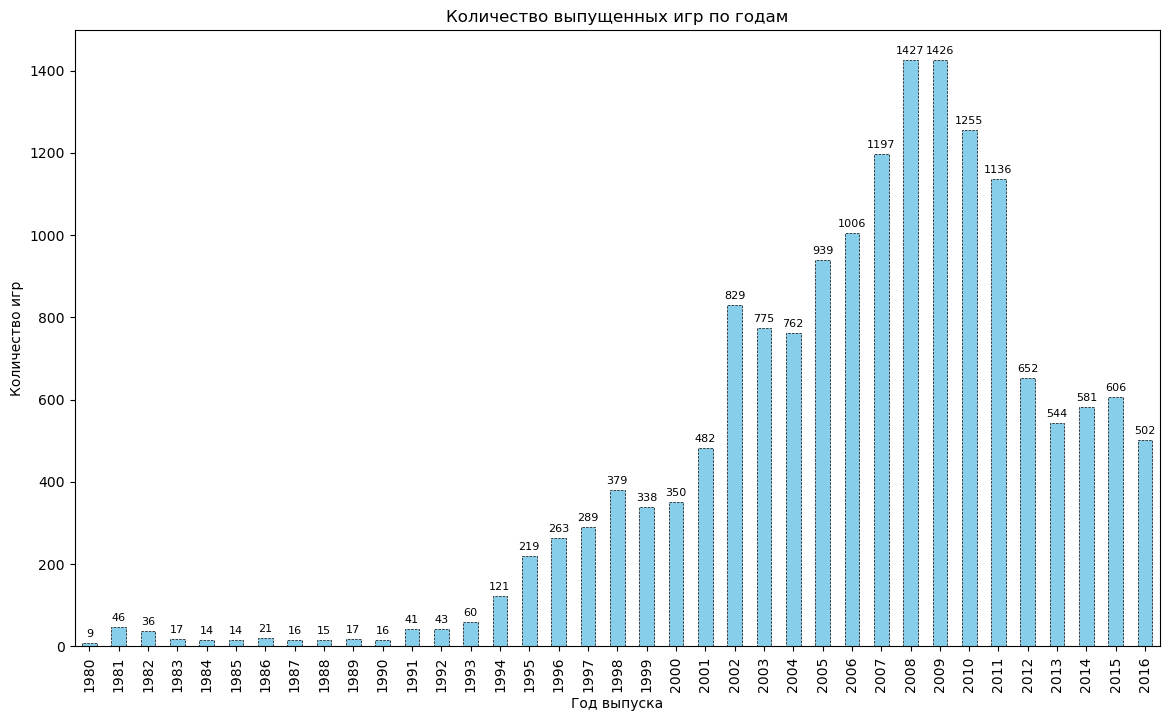

In [30]:
data_year_of_release = df.groupby('year_of_release')['name'].count()

ax = data_year_of_release.plot(kind='bar', figsize=(14, 8), color='skyblue', edgecolor='black', linestyle='--', linewidth=0.5)
ax.set_title('Количество выпущенных игр по годам')
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество игр')
for i, v in enumerate(data_year_of_release):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=8)

plt.show()

График показывает, что пик по количеству игр выпускаемых в год достиг максимума в 2009 году, далее следует тенденцию к снижению количества выпускаемых игр с 2010 по 2016 годы. Если в 2009 году количество выпускаемых игр в год было 1426, то к 2016 году оно опустилось до 502 в год (хотя данные и неполные за 2016), явно есть тенденция спада.

## Анализ продаж платформ по годам (все годы)

Сначала посмотрим, какие платформы за все годы заработали больше всего.

In [31]:
df.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False).head(10)

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.33
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


Выберем платформы PS2, X360, PS3, Wii, DS и PS как самые успешные с точки зрения продаж платформы. Отсальные платформы существенно меньше заработали.

Построем распределение выручек отобранных платформ по годам. Возьмем опять же не все годы, а последние 20 лет, чтобы проследить жизненный цикл платформ более подробно.

In [32]:
top_platforms_all_years = df.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False).head(6).index.to_list()

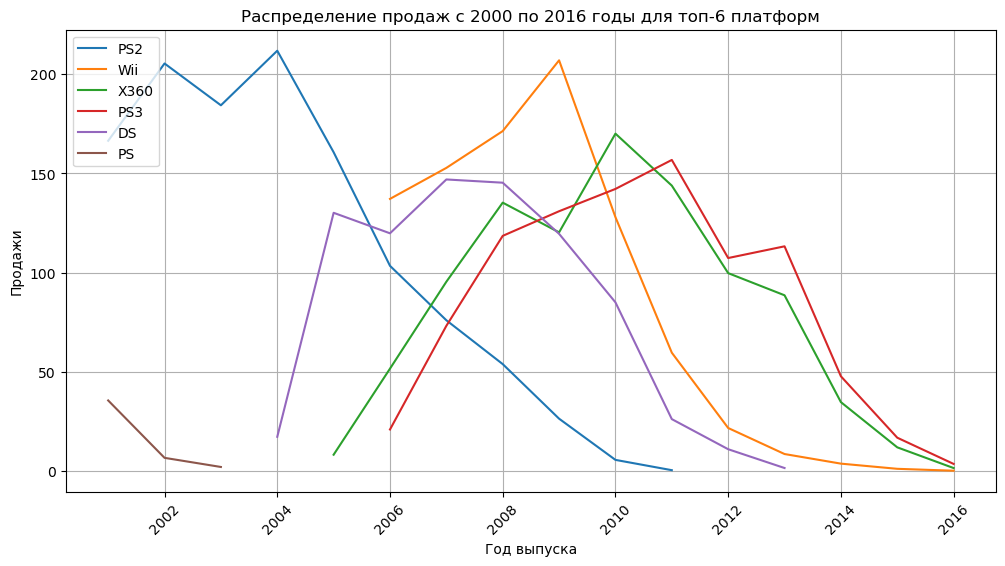

In [33]:
grouped_data = df.loc[df['year_of_release'] > 2000].groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
grouped_data_filtered = grouped_data[grouped_data['platform'].isin(top_platforms_all_years)]
grouped_data_sorted = grouped_data_filtered.sort_values(by=['total_sales'], ascending=False).reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=grouped_data_sorted)
plt.title('Распределение продаж с 2000 по 2016 годы для топ-6 платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.grid(True)

plt.xticks(rotation=45)

plt.legend(loc='upper left')

plt.show()

**Выводы:**

- Самые успешные платформы с точки зрения продаж за все время данных (PS2, X360, PS3) хотя и "дожили" до 2016 года, но практически с нулем продаж.
- Самый высокий пик продаж был у PS2 в 2004 году, после него продажи начали падать, а жизненный цикл платформы закончился в 2011 (составил 10 лет).
- Платформа X360 появилась в 2005 году и закончила свое существование в 2016 году (самый продолжительный жизненный цикл).
- Платформа PS3 появилась в 2006 году и таких же успехов, как и PS2 достигнуть не смогла, зато продажи были более стабильные, но к 2016 году их практически не стало (связано с выходом PS4)
- Платформа Wii быстро взлетела, пик по продажам был достигут в 2009 году, дальше продажи пошли на спад и уже в 2014 году были околонулевые продажи.
- Платформа DS по тенденциям продаж схожа с PS3, однако она появилась на 2 года раньше и закончила свое существование примерно в 2-13 году.
- Платформа PS продавалась, видимо, только в прошлом веке и закончило свое существование в 2003 году.

Таким образом, можно сказать, что все платформы, которые заработали больше всего денег на продажах игр закончили или практически закончили свое существование к 2016 году.

In [37]:
# Фильтруем данные DataFrame df, чтобы оставить только строки, где платформа находится в списке top_platforms_all_years
filtered_df = df[df['platform'].isin(top_platforms_all_years)]

# Считаем средний срок жизни топа платформ по продажам при помощи медианы
platform_top_lifecycle = filtered_df.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_top_lifecycle['lifecycle'] = platform_top_lifecycle['max'] - platform_top_lifecycle['min']
print(f"Средний срок жизни самых успешных платформы по продажам составляет: {platform_top_lifecycle['lifecycle'].median()}")

# Считаем средний срок жизни всех платформ при помощи медианы
platform_lifecycle = df.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifecycle['lifecycle'] = platform_lifecycle['max'] - platform_lifecycle['min']
print(f"Средний срок жизни платформ составляет: {platform_lifecycle['lifecycle'].median()}")

Средний срок жизни самых успешных платформы по продажам составляет: 10.5
Средний срок жизни платформ составляет: 6.0


## Анализ продаж платформ по годам (2013-2016)

Однако понятно, что если у компании вышла новая платформа, вряд ли игры будут выпускаться для платформ предыдущего поколения. Поэтому также необходимо посмотреть, какие платформы зарабатывали в последние полные 3 полных года (2013-2016) (предыдущие поколения платформ достигали своего пика продаж как раз к 3-4 годам своего существования)

Сначала отберем игры с годом релиза от 2013 года

In [38]:
df_2013_2016 = df.query('year_of_release >= 2013')

Далее сгруппируем данные по платформам и посчитаем сумму продаж

In [39]:
grouped_data_2013_2016 = df_2013_2016.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False).head(30)

In [40]:
grouped_data_2013_2016

,platform,total_sales
4,PS4,314.14
3,PS3,181.43
10,XOne,159.32
0,3DS,143.25
9,X360,136.80
8,WiiU,64.63
2,PC,39.43
6,PSV,32.99
7,Wii,13.66
5,PSP,3.50


Мы видим, что платформы из топ-6 платформ по общей выручке за все годы в последние годы не очень хорошо и зарабатывали. В лидерах оказалась платформы PS4, PS3 и XOne. Это новые версии уже сушествующих платформ, например, PS4 - PS3, XOne - X360. Причем судя по продажам PS4 в 2 раза успешнее XOne.

Чтобы расширить рамки анализа и понимать, как менялась динамика продаж актуальных платформ, установим временной период с 2012 года и посмотрим на динамику на графике.

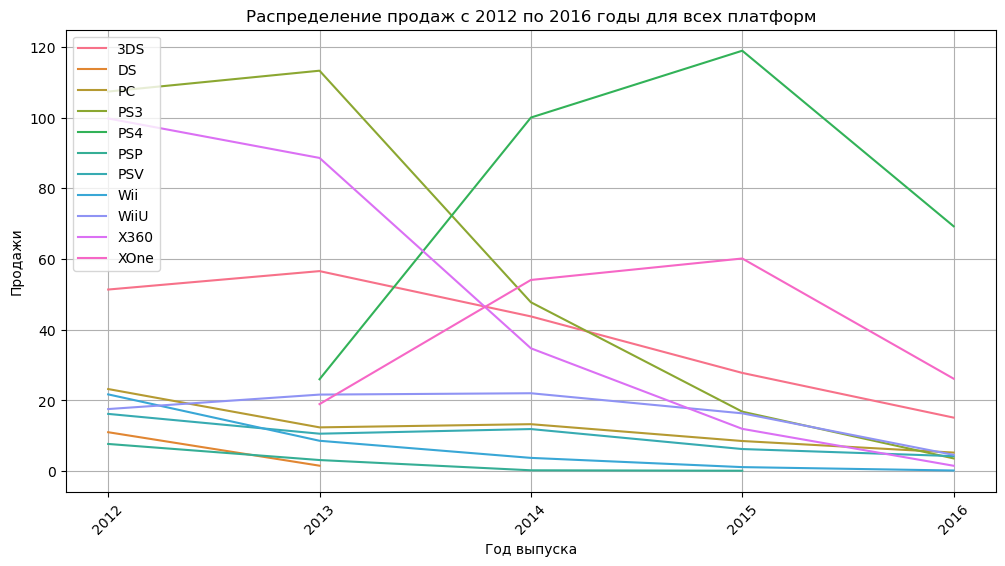

In [41]:
grouped_data_2012_2016 = df.loc[df['year_of_release'] > 2011].groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=grouped_data_2012_2016)
plt.title('Распределение продаж с 2012 по 2016 годы для всех платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.grid(True)

plt.xticks(rotation=45, ticks=grouped_data_2012_2016['year_of_release'].unique())

plt.legend(loc='upper left')

plt.show()

**Выводы:** график показывает, что хотя и PS4 и XOne платформы взлетели в 2015 году на фоне спада других платформ, продажи в 2016 снизились примерно в одинаковой пропорции. Это объясняется тем, что данные за 2016 год у нас неполные

## График "ящик с усами" по глобальным продажам игр в разбивке по платформам

Возьмем все платформы с продажами в 2013-2016 годах и посмотрим на их боксплоты

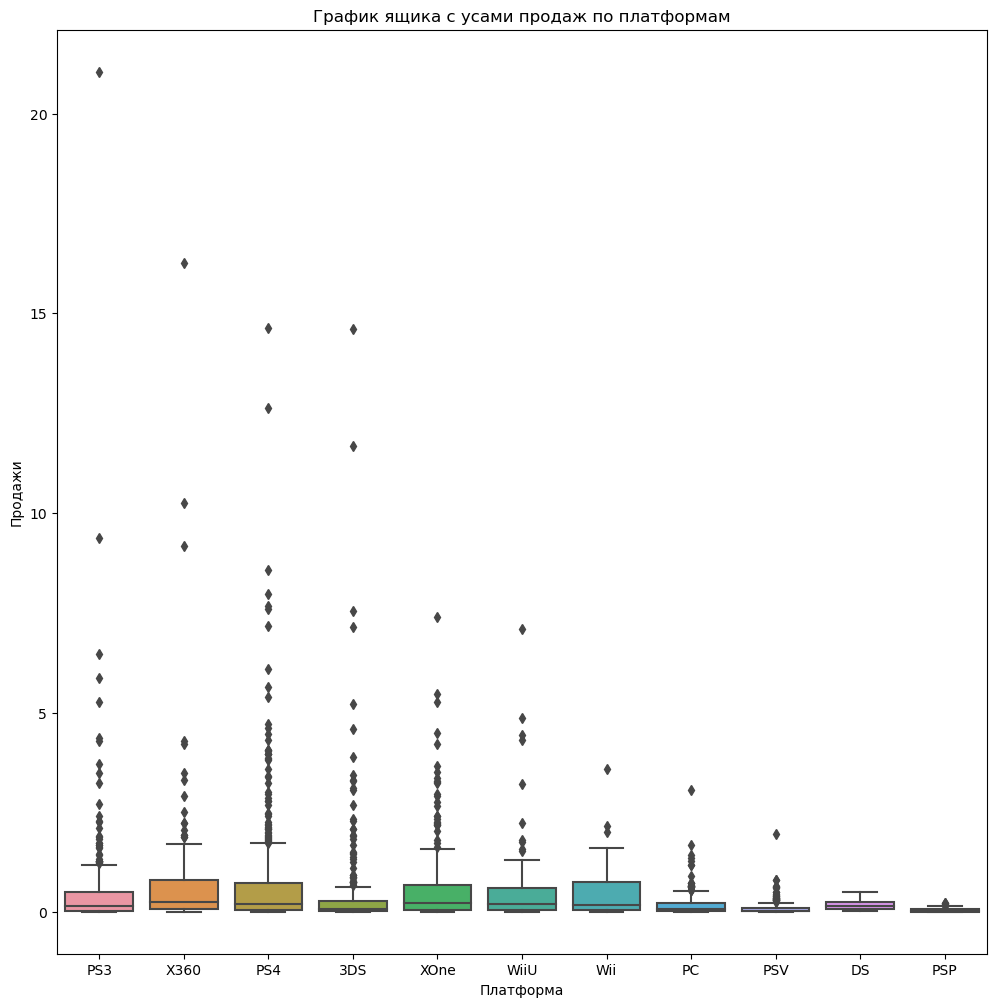

In [42]:
plt.figure(figsize=(12, 12))
sns.boxplot(x='platform', y='total_sales', data=df_2013_2016)

plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.title('График ящика с усами продаж по платформам')

plt.show()

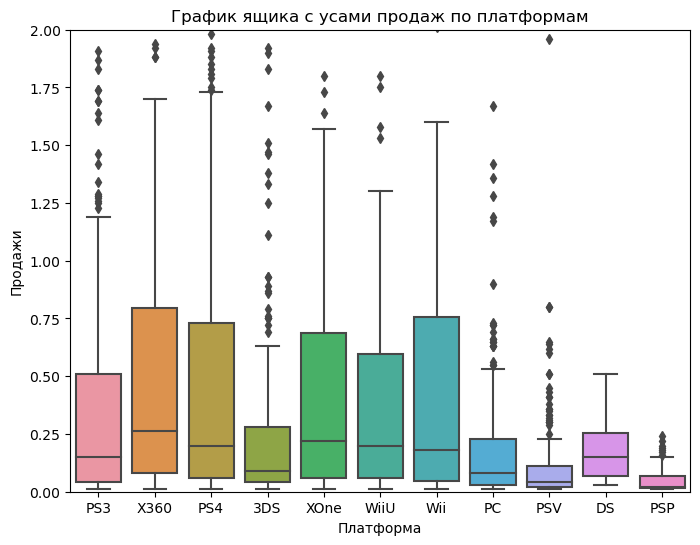

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='platform', y='total_sales', data=df_2013_2016)

plt.ylim(0, 2)
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.title('График ящика с усами продаж по платформам')

plt.show()

- У каждой платформы много выбросов
- Самая высокая медиана у платформы X360, самая низкая - у PSP
- Интересно, что медианное значение по продажам у XOne немного выше, чем у PS4 (не стоит списывать Xone со счетов). У PS4 есть игры, которые заработали намного больше (выборы)

## Влияние отзывов пользователей и критиков на продажи платформ

Напишем фунцию и выведем диаграммы рассеяния и посчитаем корреляции для каждом платформы, чтобы опеределить, влияют ли на их продажи отзывы пользователей и критиков

In [44]:
def scores_corr(data, pl):
    platforms = pl
    for platform in platforms:
        subset_data = df_2013_2016[df_2013_2016['platform'] == platform]
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        sns.scatterplot(x='user_score', y='total_sales', data=subset_data)
        plt.title(f'Диаграмма рассеяния для {platform}')
        plt.xlabel('Отзывы пользователей')
        plt.ylabel('Продажи')
        plt.grid(True)
        plt.subplot(1, 2, 2)
        sns.scatterplot(x='critic_score', y='total_sales', data=subset_data)
        plt.title(f'Диаграмма рассеяния для {platform}')
        plt.xlabel('Отзывы критиков')
        plt.ylabel('Продажи')
        plt.grid(True)
        critic_cor = subset_data['total_sales'].corr(subset_data['critic_score'])
        print(f'Коэффицент корреляции для отзывов критиков: {critic_cor:.2f}')
        user_cor = subset_data['total_sales'].corr(subset_data['user_score'])
        print(f'Коэффицент корреляции для отзывов пользователей: {user_cor:.2f}')
        plt.show()
    

In [45]:
# Создадим список всех платформ и список за исключением 'PS4'
all_platforms = df_2013_2016['platform'].unique()
all_platforms_except_PS4 = df_2013_2016['platform'].unique()
all_platforms_except_PS4 = [platform for platform in all_platforms_except_PS4 if platform != 'PS4']

применим функцию к платформе PS4, а затем и к остальным

Коэффицент корреляции для отзывов критиков: 0.41
Коэффицент корреляции для отзывов пользователей: -0.03


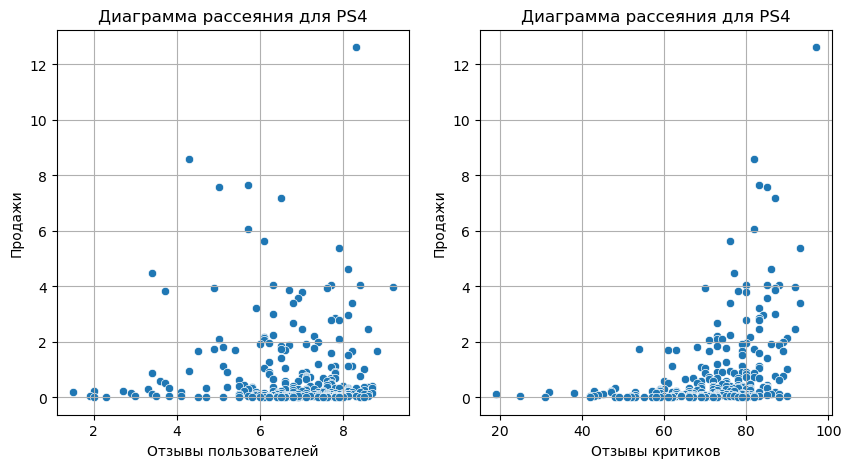

In [46]:
scores_corr(df_2013_2016, pl =['PS4']) 

Коэффицент корреляции для отзывов критиков: 0.33
Коэффицент корреляции для отзывов пользователей: 0.00


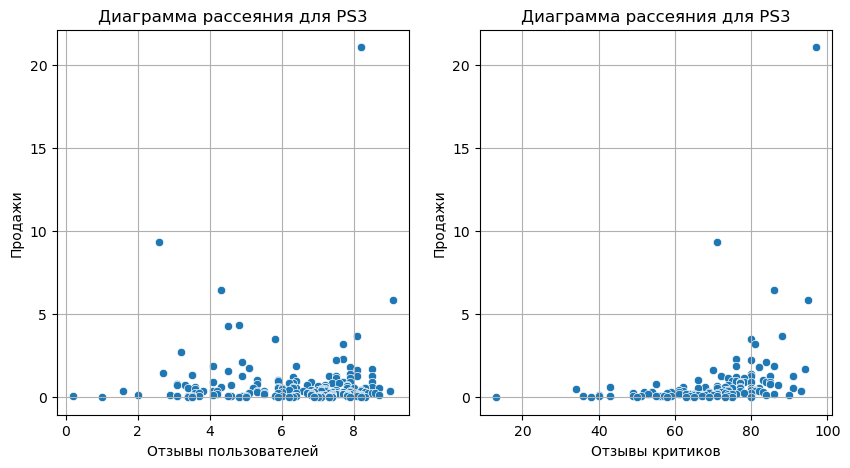

Коэффицент корреляции для отзывов критиков: 0.35
Коэффицент корреляции для отзывов пользователей: -0.01


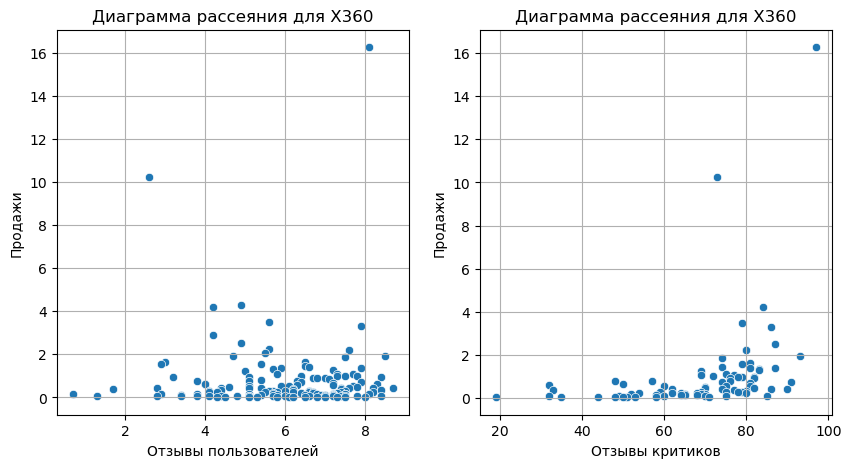

Коэффицент корреляции для отзывов критиков: 0.36
Коэффицент корреляции для отзывов пользователей: 0.24


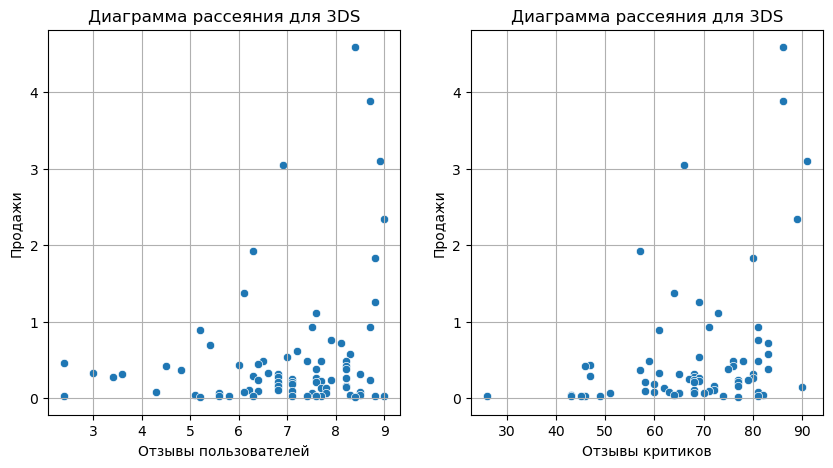

Коэффицент корреляции для отзывов критиков: 0.42
Коэффицент корреляции для отзывов пользователей: -0.07


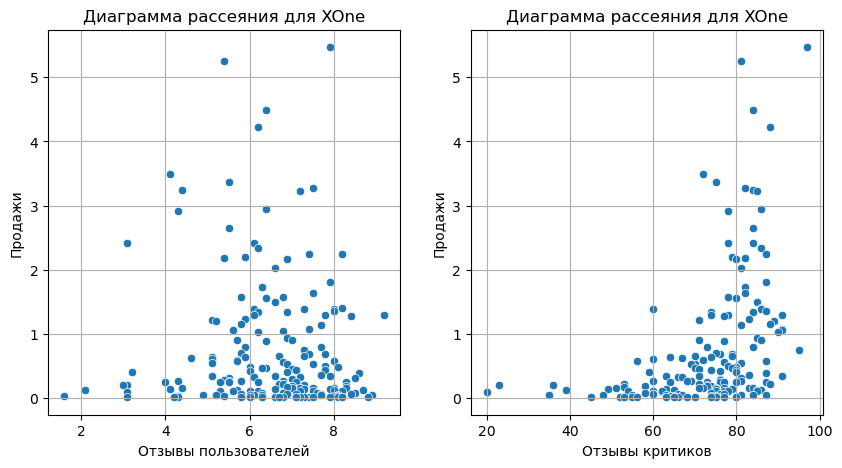

Коэффицент корреляции для отзывов критиков: 0.38
Коэффицент корреляции для отзывов пользователей: 0.42


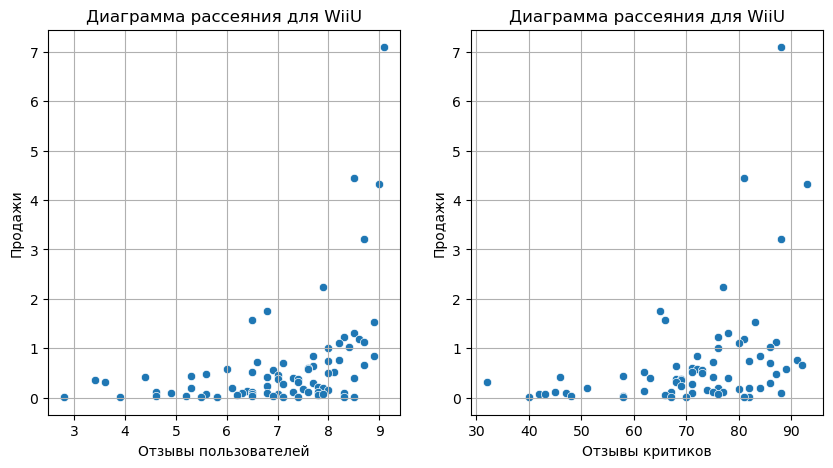

Коэффицент корреляции для отзывов критиков: nan
Коэффицент корреляции для отзывов пользователей: 0.68


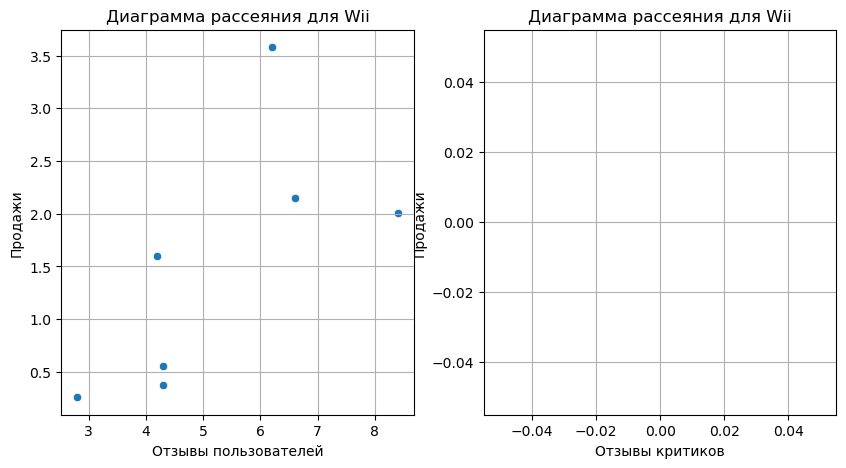

Коэффицент корреляции для отзывов критиков: 0.20
Коэффицент корреляции для отзывов пользователей: -0.09


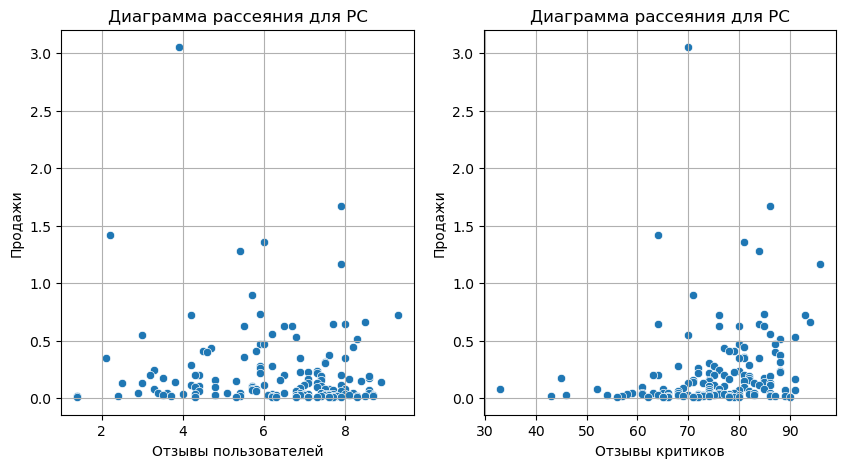

Коэффицент корреляции для отзывов критиков: 0.25
Коэффицент корреляции для отзывов пользователей: 0.00


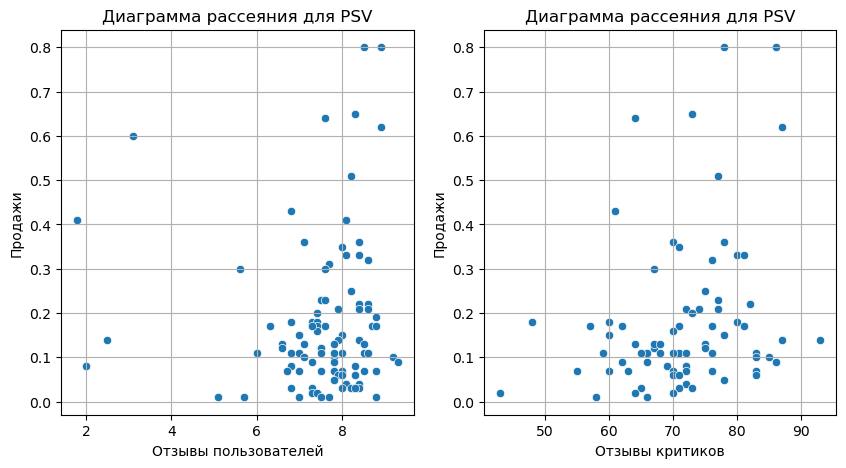

Коэффицент корреляции для отзывов критиков: nan
Коэффицент корреляции для отзывов пользователей: nan


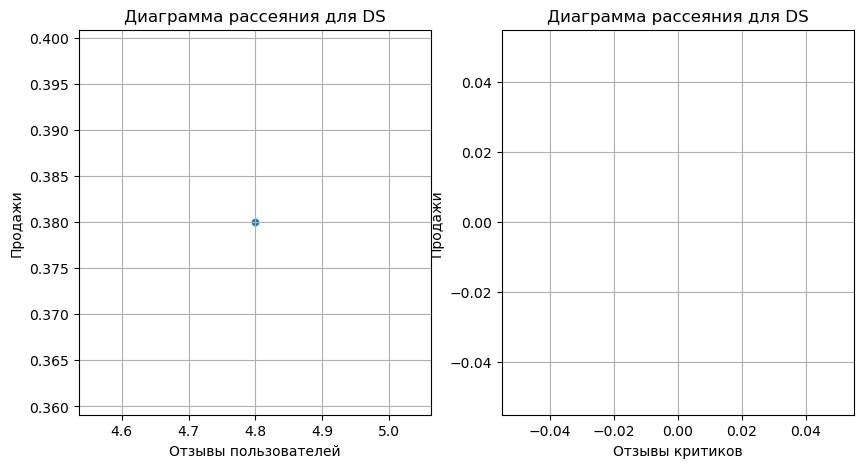

Коэффицент корреляции для отзывов критиков: nan
Коэффицент корреляции для отзывов пользователей: -1.00


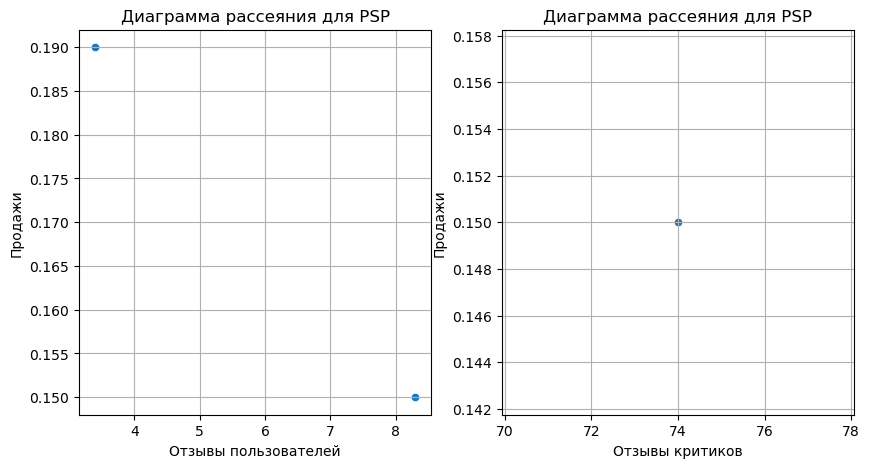

In [47]:
scores_corr(df_2013_2016, all_platforms_except_PS4) 

**Выводы:** 
- Мнение критиков важнее для продаж, чем мнение пользователей (коэффициент корреляции пользователей около нуля практически у всех платформ). Максимальное положительное влияение критиков на продажи у платформа PS4 и XOne
- Выделяются также платформы X360 и PS3 положительным влияением отзывов критиков на продажи
- Отзывы пользователей слабо влияют на продажи игр, исключение - платформа Wii. Чем выше отзывы, тем лучше продажи.
- У платформы PSP видимо слишком мало наблюдений (в реальной ситуации коэффициента корреляции практически никогода не бывает около 1)

## Общее распределение игр по жанрам

 Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [48]:
genres_pt = df_2013_2016.pivot_table(index=['genre'], values=['total_sales'], aggfunc=[np.median, len])

In [49]:
genres_pt.columns=['sum_sales', 'count_games']

In [50]:
genres_pt_sorted = genres_pt.sort_values(by='sum_sales', ascending=False)
genres_pt_sorted_2 = genres_pt.sort_values(by='count_games', ascending=False)

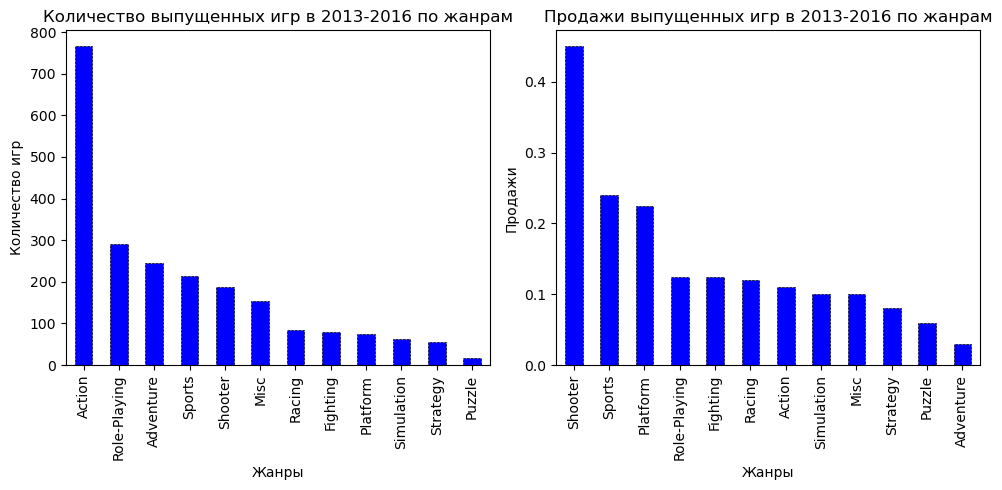

In [51]:

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Первый график
ax1 = genres_pt_sorted_2['count_games'].plot(kind='bar', color='blue', edgecolor='black', linestyle='--', linewidth=0.5, ax=axes[0])
ax1.set_title('Количество выпущенных игр в 2013-2016 по жанрам')
ax1.set_xlabel('Жанры')
ax1.set_ylabel('Количество игр')

# Второй график
ax2 = genres_pt_sorted['sum_sales'].plot(kind='bar', color='blue', edgecolor='black', linestyle='--', linewidth=0.5, ax=axes[1])
ax2.set_title('Продажи выпущенных игр в 2013-2016 по жанрам')
ax2.set_xlabel('Жанры')
ax2.set_ylabel('Продажи')

plt.tight_layout()

plt.show()

**Выводы:** 
- За последние 3-4 года самыми полулярными жанрами с точки зрения количества релизов были игры в жанре action, однако продаются они не так хорошо
- Лидеры по медианному значению продаж - жанры shooter (на 5 месте по количеству релизов), sports (на 4 месте по количеству релизов) и platform (на 4 с конца месте по количеству релизов)

##  Портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы (топ-5) среди пользователей каждого региона (NA, EU, JP)

Сначала подготовим данные

In [52]:
def sales_regions(data, column, region_sales):
    sales_data = data.pivot_table(index=column, values=region_sales, aggfunc='sum')
    sales_data = sales_data.sort_values(by=region_sales, ascending=False)
    top_5 = sales_data.head()
    sales_data['grouped'] = sales_data.index.where(sales_data.index.isin(top_5.index), 'others')
    grouped_data = pd.DataFrame(sales_data.groupby('grouped')[region_sales].sum().sort_values(by=region_sales, ascending=False))
    
    fig, axes = plt.subplots(1, len(region_sales), figsize=(15, 5))

    for i, region in enumerate(region_sales):
        ax = axes[i]
        ax.pie(grouped_data[region].values, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
        ax.set_title(f'% продаж среди топ-5 {column} в {region.upper()}')

    plt.tight_layout()
    plt.show()

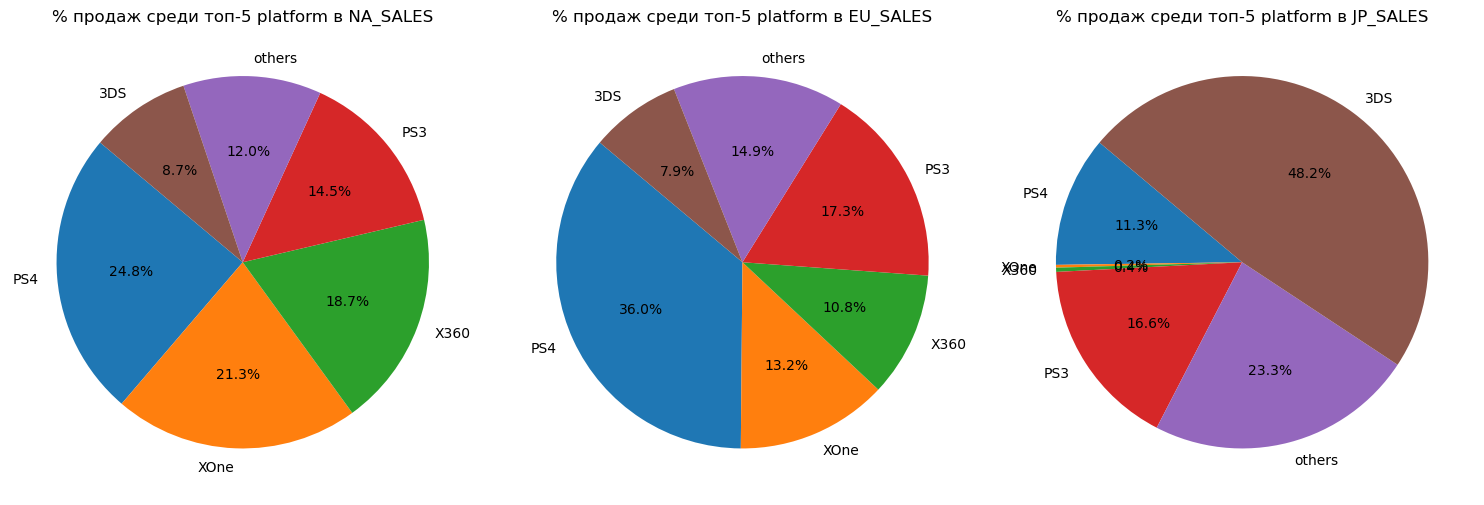

In [53]:
# Применяем функцию к столбцу 'platform'
sales_regions(df_2013_2016, 'platform', ['na_sales', 'eu_sales', 'jp_sales'])

**Выводы:**
- Для всех регионов продажт ТОП-5 платформ составляет большую часть всех продаж
- в Северной Америке (NA) и Европе (EU) распределение продаж среди платформ схоже - самая популярная платформа - PS4, далее следует XOne (причем продажи XOne (21,3%) в Северной Америке приближаются к продажам PS4 (24,8%))
- X360 занимает место в топе в Северной Америке (18,7%), в других регионах данная платформа имеет намного меньшую долю
- Распределение продаж в Японии значительно отличается от Северной Америки и Европы: продажи распределены практически все между топом 5. Лидер - 3DS (почти половина рынка 48,2%). Получается, что японцы предпочитают портативные игры. На втором месте PS3 (16.6%).

### Самые популярные жанры игр (топ-5) среди пользователей каждого региона (NA, EU, JP)

Аналогичным способом применим функцию sales_regions к жанрам игр

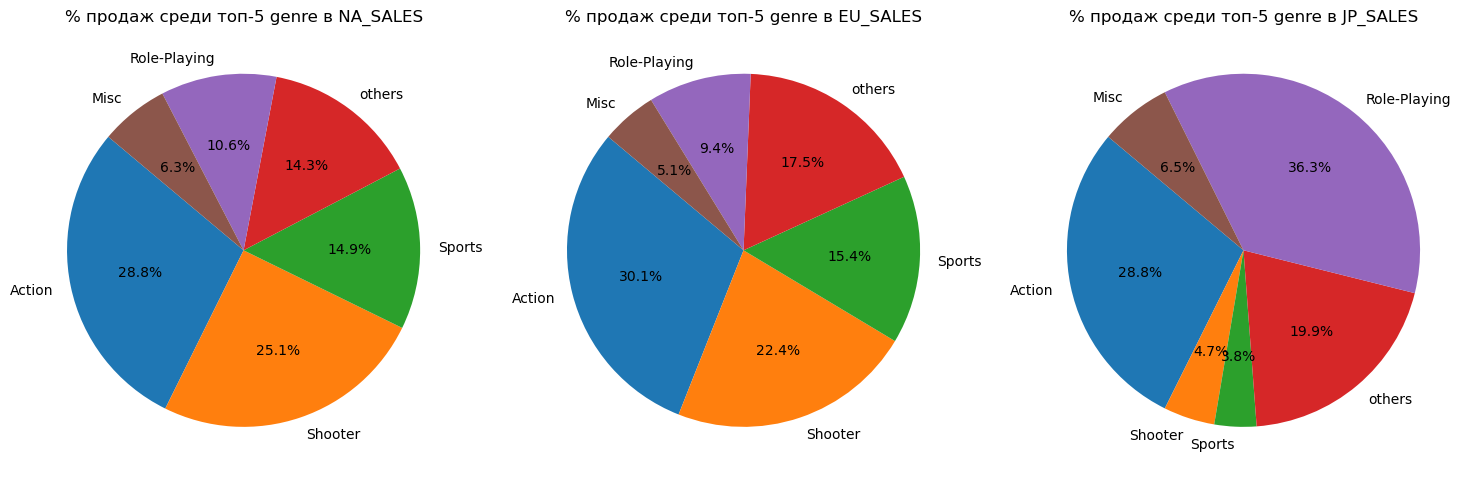

In [54]:
sales_regions(df_2013_2016, 'genre', ['na_sales', 'eu_sales', 'jp_sales'])

**Выводы:**
- Структура популярных жанров и их продаж примерно схожа в Северной Америке и Европе
- В Северной Америке преобладает жанр игр action (28,8%), на втором месте - shooter (25.1%), далее следует жанр sports (14.9%)
- В Европе самый популярный жанр - action (30,1%), далее - shooter (22.4%), на третьем месте - sports (15.4%)
- В Японии ситуация немного другая - на первом месте жанр role_playing (36.3%), на втором - action (28.8%), на третьем - Misc (6,5%). 
- Таким образом, в Японии преобладают 2 жанра, а в Северной Америке и Европе по 3.

### Влияние рейтинга ESRB на продажи в каждом регионе (NA, EU, JP)

Проверим, влияет ли рейтинг ESRB на продажи в каждом регионе

Сначала заполним пропуски в столбце с рейтингом значение 'zero'

In [55]:
df_2013_2016['rating'] = df_2013_2016['rating'].fillna('zero')
df_2013_2016['rating'].unique()

array(['M', 'zero', 'E', 'T', 'E10+'], dtype=object)

In [56]:
# Группируем данные по категории рейтинга ESRB и вычисляем сумму продаж
sum_sales_by_rating = pd.DataFrame(df_2013_2016.groupby('rating').agg({'na_sales': 'sum', 'eu_sales' : 'sum', 'jp_sales' : 'sum'}))

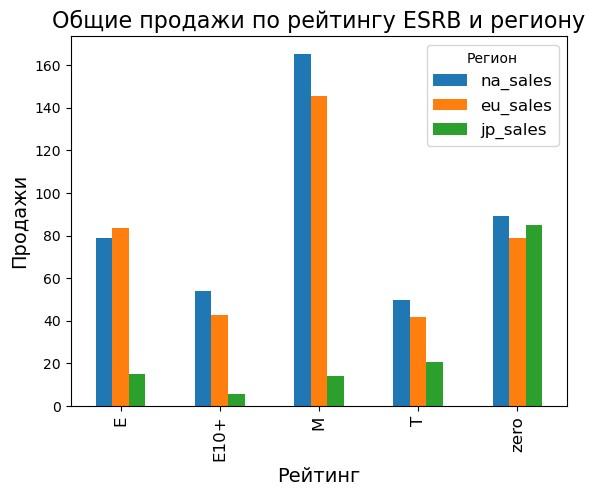

In [57]:
ax = sum_sales_by_rating.plot(kind='bar')

plt.title('Общие продажи по рейтингу ESRB и региону', fontsize=16)
plt.xlabel('Рейтинг', fontsize=14)
plt.ylabel('Продажи', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

plt.legend(title='Регион', fontsize=12)

plt.show()


Рейтинг ESRB в основном работает на территории США и Канады, в Европе же и Японии есть свои рейтинговые системы.

In [58]:
df_2013_2016.query('rating == "zero"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,zero,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,zero,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,zero,11.68
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,zero,9.18
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,zero,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,zero,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,zero,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,zero,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,zero,0.01


**Выводы:**
- Продажи лучше всего у рейтинга М (17+). Особенно показательны Европа и Северная америка в данном возрастном сегменте
- Дальше по сумме продаж следует рейтинг E (для всех, 6+)
- далее T (13+). В Японии больше всего денег принесли игры именно этого рейтинга

## Проверка гипотез

**Сформулируем гипотезу № 1:**

- H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1: в средних пользовательских рейтингов платформ Xbox One и PC есть различия

Чтобы выбрать статистический тест необходимо понимать, как распределена переменная.

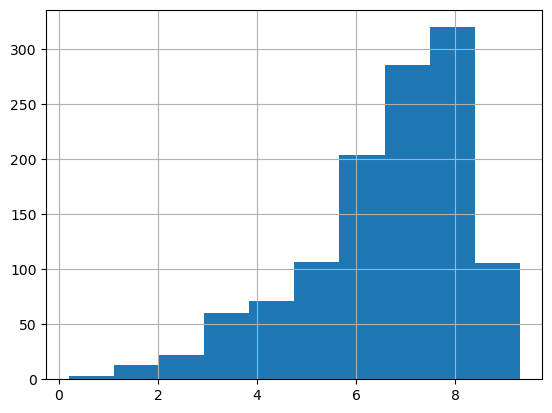

In [59]:
df_2013_2016['user_score'].hist()
plt.show()

Пользовательская оценка распределена ненормально, есть скошенность в правую сторону

Таким образом, нужно выбрать статистический критерий,(1) который при оценке не так чувствителен к распределению - t-тест или (2) критерий, который предназначен для оценки переменных с ненормальным распределением - критерий Манна-Уитни.

**Но так как в задании нужно оценить различия между средними, то применяем t-тест**

In [60]:
# Выборки с рейтингами для платформ Xbox One и PC
XOne_data = df_2013_2016.loc[df_2013_2016['platform'] =='XOne']['user_score'].dropna()
PC_data = df_2013_2016.loc[df_2013_2016['platform'] =='PC']['user_score'].dropna()

# Выполните t-тест
results = st.ttest_ind(XOne_data, PC_data, equal_var=False)

# Значение уровня значимости
alpha = 0.05

# Вывод значения p-value на экран
print("p-value:", results.pvalue)

# Проверка уровня значимости
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские оценки платформ Xbox One и PC различаются")
else:
    print("Не отвергаем нулевую гипотезу: средние пользовательские оценки платформ Xbox One и PC одинаковые")


p-value: 0.14759594013430463
Не отвергаем нулевую гипотезу: средние пользовательские оценки платформ Xbox One и PC одинаковые


**Вывод:** статистический тест показал, что мы не можем отвергнуть нулевую гипотезу о том, что пользовательские оценки платформ одинаковые

**Гипотеза № 2:**

- H0: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
- H1: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [61]:
action_data = df_2013_2016.loc[df_2013_2016['genre'] =='Action']['user_score'].dropna()
sports_data = df_2013_2016.loc[df_2013_2016['genre'] =='Sports']['user_score'].dropna()

# Выполните t-тест
results = st.ttest_ind(action_data, sports_data, equal_var=False)

# Значение уровня значимости
alpha = 0.05

# Вывод значения p-value на экран
print("p-value:", results.pvalue)

# Проверка уровня значимости
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются")
else:
    print("Не отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports одинаковые")


p-value: 1.4460039700704315e-20
Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются


**Вывод:** тест показал, что мы можем отвергнуть нулевую гипотезу о том, что средние пользовательские оценки жанров Action и Sports одинаковые.

# Выводы

**1. Предобработка данных:**
- заменили названия столбцо (привели к нижнему регистру)
- преобразовали данные в нужные типы
- пропуски в столбцах с рейтингами (user_score, critic_score и rating) оставили так, как есть, так как их достаточно много (практически половина игр не содержит их)
- пропуски в столбцах name и year_of_release удалили (небольшой % данных)
- заменили аббревиатуру 'tbd' на nan
- добавили столбец с суммарными продажами

**2. Исследовательский анализ данных**
- общая тендеция в индустрии игр - снижение количества релизов в год (пик был в 2009 году)
- для выявления закономерностей успешных игр был выполнен анализ игр с годом выпуска 2013-2016, так как индустрия игр достаточно быстро развивается (это показал анализ продолжительности жизненого цикла платформ)
- примерно расчитали средний срок жизни платформ:

*средний срок жизни самых успешных платформы по продажам составляет: 10.5,
 средний срок жизни платформ составляет: 6.0*

- выбрали актуальные период 2013-2016 для анализа текущих тенденций индустрии
- выявили, что мнение критиков важнее для продаж, чем мнение пользователей (коэффициент корреляции пользователей около нуля практически у всех платформ). Максимальное положительное влияение критиков на продажи у платформа PS4 и XOne
- выявили самые прибыльные жанры - shooter, sports и platform, а вот по количеству релизов лидер жанр action, однако продаются игры данного жанра не так хорошо
- определили для пользователя каждого региона (NA, EU, JP) самые популярные платформы и жанры (топ-5) и описали различия в долях продаж:

*В Северной Америке (NA) и Европе (EU) распределение продаж среди платформ схоже - самая популярная платформа - PS4, далее следует XOne (причем продажи XOne (21,3%) в Северной Америке приближаются к продажам PS4 (24,8%)
Распределение продаж в Японии значительно отличается от Северной Америки и Европы: продажи распределены практически все между топом Лидер - 3DS (почти половина рынка 48,2%). Получается, что японцы предпочитают портативные игры. На втором месте PS3 (16.6%).
Структура популярных жанров и их продаж примерно схожа в Северной Америке и Европе.В Северной Америке преобладает жанр игр action (28,8%), на втором месте - shooter (25.1%), далее следует жанр sports (14.9%). В Европе самый популярный жанр - action (30,1%), далее - shooter (22.4%), на третьем месте - sports (15.4%). В Японии ситуация немного другая - на первом месте жанр role_playing (36.3%), на втором - action (28.8%), на третьем - Misc (6,5%).* 

- определили, что рейтинг ESRB практически не влияет на продажи в каждом регионе
- проверили гипотезу №1 и выявили, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- проверили гипотезу № 2 и выявили, что в средних пользовательских рейтингов жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») есть разница


**В результате работы можно предположить, какие закономерности могут определить успешную игру в 2017 году:**
1. Игра в жанре Shooter или Sports (ориентируемся на портрет покупателя в Северной Америке или Европе + самые продаваемые жанры)
2. Платформа PS4 или XOne (актуальные и продающие платформы в 2016 году)
3. Возрастной рейтинг M (17+)
4. Важно при выборе ориентироваться на оценки критиков - чем лучше оценка, тем больше продажи. А вот отзывы критиков как показал анализ не влияют на продажи.